In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
temperature = pd.read_csv("./GlobalTemperatures.csv")
temperature.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [4]:
temp = temperature[temperature["dt"] >= "1850-01-01"].drop(columns=["LandAverageTemperatureUncertainty",
                                                                          "LandMaxTemperatureUncertainty",
                                                                          "LandMinTemperatureUncertainty",
                                                                          "LandAndOceanAverageTemperatureUncertainty"])

In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dt                              1992 non-null   object 
 1   LandAverageTemperature          1992 non-null   float64
 2   LandMaxTemperature              1992 non-null   float64
 3   LandMinTemperature              1992 non-null   float64
 4   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4), object(1)
memory usage: 93.4+ KB


In [6]:
temp.describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,14.350601,2.743595,15.212566
std,4.263193,4.309579,4.155835,1.274093
min,0.404000,5.900000,-5.407000,12.475000
25%,4.430000,10.212000,-1.334500,14.047000
50%,8.850500,14.760000,2.949500,15.251000
75%,12.858500,18.451500,6.778750,16.396250
max,15.482000,21.320000,9.715000,17.611000


<AxesSubplot:xlabel='dt'>

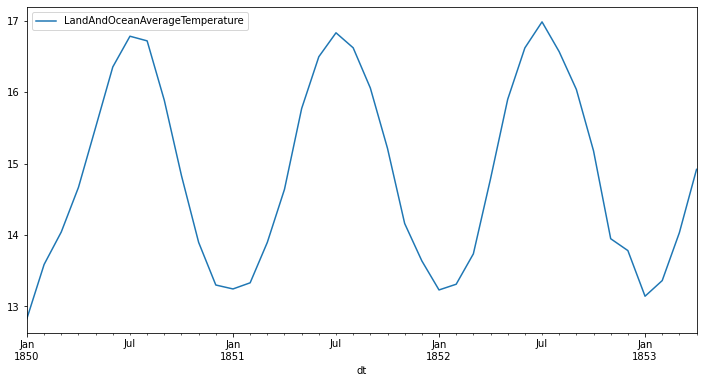

In [7]:
temp["dt"] = pd.to_datetime(temp["dt"])
land_and_ocean = temp[["dt","LandAndOceanAverageTemperature"]].set_index("dt")
plt.rcParams["figure.figsize"] = (12,6)
land_and_ocean.head(40).plot()

В наборе данных представлена среднемесячная температура. Нам нужна среднегодовая, что удобнее, нет сезонных колебаний

In [8]:
temp = temp.set_index(temp["dt"])
temp = temp.sort_index()
temp = temp.resample('A').mean()
temp.index.rename("Year", inplace=True)
temp.index = temp.index.year
temp.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,7.900667,13.476667,1.964333,14.867167
1851,8.178583,13.081000,2.203917,14.991833
1852,8.100167,13.397333,2.337000,15.006500
1853,8.041833,13.886583,1.892500,14.955167
1854,8.210500,13.977417,1.762167,14.991000


In [9]:
disasters = pd.read_csv("./number-of-natural-disaster-events.csv")
disasters.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


Данные о катаклизмах начинаются с 1900 года, поэтому в данных температуры смело дропаем все, что раньше 1900

In [10]:
temp = temp[temp.index >= 1900]
temp.rename(columns={"LandAverageTemperature": "land_average_temp",
                    "LandMaxTemperature": "land_max_temp",
                    "LandMinTemperature": "land_min_temp",
                    "LandAndOceanAverageTemperature": "land_and_ocean_av"}, inplace=True)
temp.head()

,land_average_temp,land_max_temp,land_min_temp,land_and_ocean_av
Year,,,,
1900,8.501583,14.389500,2.575667,15.143917
1901,8.541917,14.512167,2.490500,15.073333
1902,8.304417,14.364250,2.203750,14.958333
1903,8.220167,14.085750,2.283333,14.836583
1904,8.090917,14.063667,2.171083,14.810417


In [11]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     828 non-null    object 
 1   Code                                                       0 non-null      float64
 2   Year                                                       828 non-null    int64  
 3   Number of reported natural disasters (reported disasters)  828 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 26.0+ KB


In [12]:
disasters["Entity"].value_counts()

All natural disasters    119
Earthquake               115
Extreme weather          115
Flood                     95
Landslide                 80
Volcanic activity         78
Drought                   73
Wildfire                  62
Extreme temperature       57
Mass movement (dry)       33
Impact                     1
Name: Entity, dtype: int64

In [13]:
n_disasters = pd.pivot_table(disasters,
              index="Year",
              columns="Entity",
              values = "Number of reported natural disasters (reported disasters)")
n_disasters

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2014,320.0,18.0,26.0,17.0,99.0,135.0,NaN,15.0,NaN,6.0,4.0
2015,380.0,28.0,23.0,12.0,118.0,160.0,NaN,20.0,1.0,6.0,12.0
2016,325.0,15.0,30.0,12.0,84.0,161.0,NaN,13.0,NaN,NaN,10.0


Заполним NaN нулями, потому что нет сведений о них, будем считать, что не было. Переименуем столбцы для удобства

In [14]:
n_disasters.fillna(0, inplace=True)
n_disasters.rename(columns={"All natural disasters": "all",
                           "Drought": "drought",
                           "Earthquake": "eartchquake",
                           "Extreme temperature": "extreme_temp",
                           "Extreme weather": "extreme_weather",
                           "Flood": "flood",
                           "Impact": "impact",
                           "Landslide": "landslide",
                           "Mass movement (dry)": "mass_move",
                           "Volcanic activity": "volcans",
                           "Wildfire": "wildfire"}, inplace=True)
n_disasters = n_disasters.astype("Int16")
n_disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1900 to 2018
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   all              119 non-null    Int16
 1   drought          119 non-null    Int16
 2   eartchquake      119 non-null    Int16
 3   extreme_temp     119 non-null    Int16
 4   extreme_weather  119 non-null    Int16
 5   flood            119 non-null    Int16
 6   impact           119 non-null    Int16
 7   landslide        119 non-null    Int16
 8   mass_move        119 non-null    Int16
 9   volcans          119 non-null    Int16
 10  wildfire         119 non-null    Int16
dtypes: Int16(11)
memory usage: 4.8 KB


In [15]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1900 to 2015
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   land_average_temp  116 non-null    float64
 1   land_max_temp      116 non-null    float64
 2   land_min_temp      116 non-null    float64
 3   land_and_ocean_av  116 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


In [16]:
# данные по температуре до 2015, а по катаклизмам ло 2018. уравняем
n_disasters = n_disasters[n_disasters.index < 2016]
n_disasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1900 to 2015
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   all              116 non-null    Int16
 1   drought          116 non-null    Int16
 2   eartchquake      116 non-null    Int16
 3   extreme_temp     116 non-null    Int16
 4   extreme_weather  116 non-null    Int16
 5   flood            116 non-null    Int16
 6   impact           116 non-null    Int16
 7   landslide        116 non-null    Int16
 8   mass_move        116 non-null    Int16
 9   volcans          116 non-null    Int16
 10  wildfire         116 non-null    Int16
dtypes: Int16(11)
memory usage: 4.6 KB


In [17]:
full_data = temp.join(n_disasters)
full_data

,land_average_temp,land_max_temp,land_min_temp,land_and_ocean_av,all,drought,eartchquake,extreme_temp,extreme_weather,flood,impact,landslide,mass_move,volcans,wildfire
Year,,,,,,,,,,,,,,,
1900,8.501583,14.389500,2.575667,15.143917,5,2,0,0,1,1,0,0,0,1,0
1901,8.541917,14.512167,2.490500,15.073333,2,0,2,0,0,0,0,0,0,0,0
1902,8.304417,14.364250,2.203750,14.958333,9,0,3,0,1,0,0,0,0,5,0
1903,8.220167,14.085750,2.283333,14.836583,8,1,1,0,2,2,0,0,1,1,0
1904,8.090917,14.063667,2.171083,14.810417,2,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,9.516000,15.284833,3.827667,15.769500,334,17,30,16,84,156,0,17,0,6,8
2012,9.507333,15.332833,3.756167,15.802333,346,21,27,51,90,136,0,13,1,1,6
2013,9.606500,15.373833,3.911333,15.854417,332,9,29,14,105,149,1,11,1,3,10


In [18]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1900 to 2015
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   land_average_temp  116 non-null    float64
 1   land_max_temp      116 non-null    float64
 2   land_min_temp      116 non-null    float64
 3   land_and_ocean_av  116 non-null    float64
 4   all                116 non-null    Int16  
 5   drought            116 non-null    Int16  
 6   eartchquake        116 non-null    Int16  
 7   extreme_temp       116 non-null    Int16  
 8   extreme_weather    116 non-null    Int16  
 9   flood              116 non-null    Int16  
 10  impact             116 non-null    Int16  
 11  landslide          116 non-null    Int16  
 12  mass_move          116 non-null    Int16  
 13  volcans            116 non-null    Int16  
 14  wildfire           116 non-null    Int16  
dtypes: Int16(11), float64(4)
memory usage: 12.3 KB


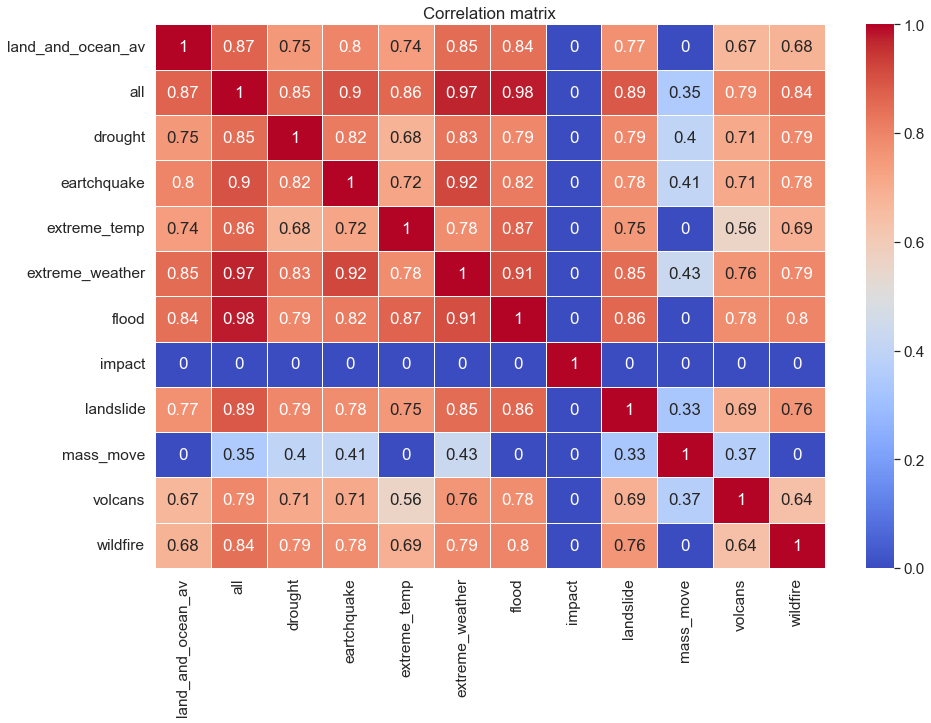

In [19]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = full_data.drop(columns=["land_average_temp", "land_max_temp", "land_min_temp"]).corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

очень много сильных положительных зависимостей. попробую посмотреть связь между всеми катастрофами и общей средней температурой

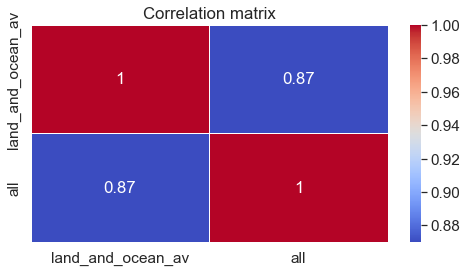

In [20]:
def draw_corr_matrix(data, fields):
    plt.figure(figsize = (8, 4))

    sns.set(font_scale=1.4)

    corr_matrix = data[fields].corr()
    corr_matrix = np.round(corr_matrix, 2)
    corr_matrix[np.abs(corr_matrix) < 0.3] = 0

    sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

    plt.title('Correlation matrix')
    plt.show()

draw_corr_matrix(full_data, ["land_and_ocean_av", "all"])

Присутствует очень сильная прямая зависимость. Можно попробовать применить линейную регрессию для прогнозов

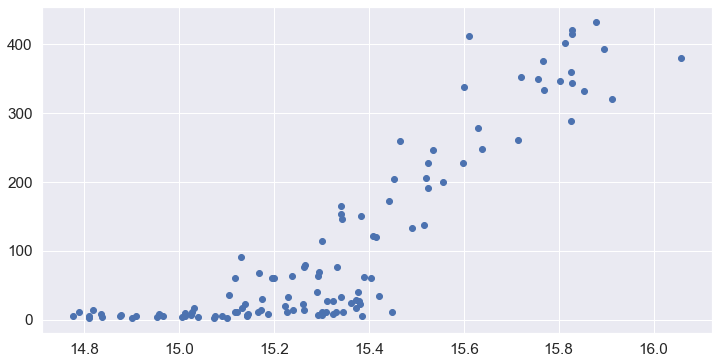

In [21]:
plt.scatter(x=full_data["land_and_ocean_av"], y=full_data["all"])
plt.show()

<AxesSubplot:xlabel='Year'>

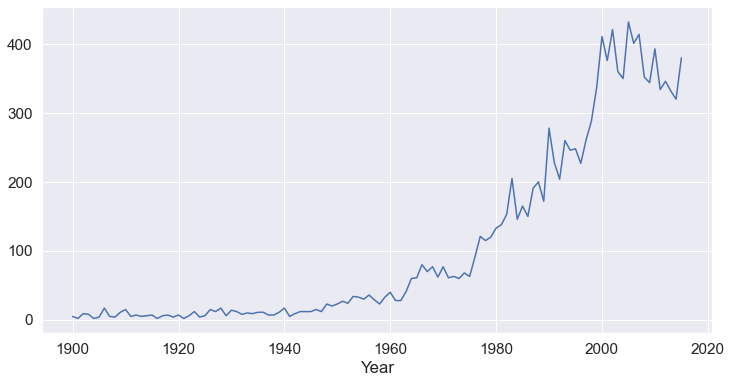

In [22]:
full_data["all"].plot()

Предположу, что в начале века сведений было очень мало о катастрофах в мире, поэтому эти данные могут исказить общую картину
Возьмем данные, начиная с 1940 года

In [23]:
full_data = full_data[full_data.index >= 1940]

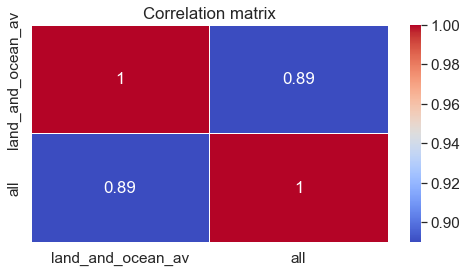

In [24]:
draw_corr_matrix(full_data, ["land_and_ocean_av", "all"])

In [25]:
#зависимость стала сильнее, построим регрессию

# для парной регрессии
def pair_regression(x, y):
    b1 = ((x*y).mean() - y.mean()*x.mean()) / ((x*x).mean() - x.mean()**2)
    b0 = y.mean() - b1*x.mean()
    return np.array([b0, b1])

# метод наименьших квадратов
def min_squares(x, y):
    x1 = x[:, np.newaxis]
    x1 = np.insert(x1, 0, 1, axis=1)
    b = np.linalg.inv(x1.T.dot(x1)).dot(x1.T)@y
    return b

In [26]:
x = full_data["land_and_ocean_av"].to_numpy()
y = full_data["all"].to_numpy().astype("float")
x, y

(array([15.37208333, 15.38466667, 15.32533333, 15.345     , 15.44908333,
        15.33075   , 15.26275   , 15.31016667, 15.26116667, 15.22275   ,
        15.1395    , 15.31116667, 15.36308333, 15.42108333, 15.23058333,
        15.17433333, 15.106     , 15.37408333, 15.38208333, 15.3405    ,
        15.29191667, 15.37991667, 15.32558333, 15.37666667, 15.11708333,
        15.19575   , 15.26466667, 15.29416667, 15.26391667, 15.3905    ,
        15.33266667, 15.2       , 15.29291667, 15.40475   , 15.16808333,
        15.23866667, 15.13108333, 15.40825   , 15.30091667, 15.41416667,
        15.49183333, 15.51616667, 15.34191667, 15.52025   , 15.34416667,
        15.34066667, 15.384     , 15.5245    , 15.55575   , 15.44158333,
        15.62933333, 15.598     , 15.453     , 15.46641667, 15.535     ,
        15.63783333, 15.52466667, 15.71383333, 15.826     , 15.60033333,
        15.61066667, 15.7675    , 15.82916667, 15.82658333, 15.75725   ,
        15.87925   , 15.8135    , 15.82733333, 15.7

In [27]:
b = pair_regression(x, y)
b

array([-8090.77899804,   533.315434  ])

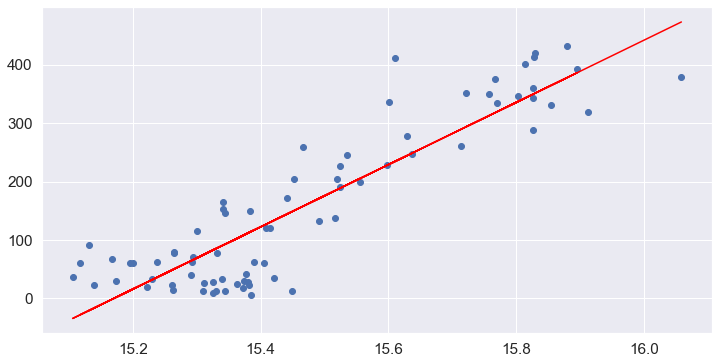

In [28]:
def regression(x, b):
    x1 = x[:, np.newaxis]
    x1 = np.insert(x1, 0, 1, axis=1)
    return x1 @ b
    
def draw_regression(x, y, b):
    z = regression(x, b)
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y)
    plt.plot(x, z, color='red')
    plt.show()

draw_regression(x, y, b)

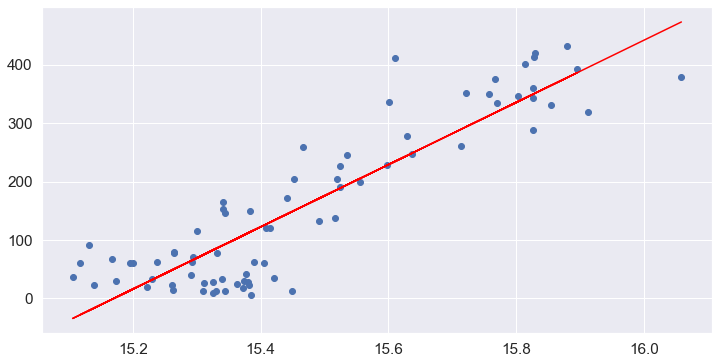

In [29]:
b1 = min_squares(x, y)
draw_regression(x, y, b1)

In [30]:
b, b1

(array([-8090.77899804,   533.315434  ]),
 array([-8090.77899804,   533.315434  ]))

Проведем оценку регрессии с использованием различных критериев:
1. Коэффициент детерминации
2. Ошибка аппроксимации
3. Критерий Фишера
4. Значимость коэффициентов b0 и b1

In [31]:
z = regression(x, b)
r2 = z.var() / y.var()
r2

0.7991249904142363

In [32]:
A = np.abs((y - z)) / y
A.mean()
# ошибка получилась довольно большой из за разброса данных 

1.476043960559993

In [33]:
# вычислим критерий Фишера с уровнем значимости 0.05
from scipy import stats

n = len(y)
k = 1
k1 = k
k2 = n - k - 1
T = (r2 / (1 - r2)) * (k2 / k1)
alpha = 0.05
F_crit = stats.f.ppf(1-alpha, k1, k2)
T, F_crit, T > F_crit

(294.3882836028226, 3.970229580187842, True)

Как видим, что наш критерий значительно превышает критерий Фишера, значит наша регрессия статистически значима и можно ее применять

In [34]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [35]:
# b1
err_slope = standard_error_slope(x, y, z)
t = stats.t.ppf(1-alpha/2, n-2)
T = b[1]/err_slope
(-t, t), T

((-1.99254349484682, 1.99254349484682), 17.157747043351858)

In [36]:
# b0
err_intercept = standard_error_intercept(x, y, z)
T = b[0]/err_intercept
(-t, t), T

((-1.99254349484682, 1.99254349484682), -16.82717276057452)

#### Оба параметра находятся в критических областях, что делает их статистически значимыми

Сравним наши параметры регрессии с библиотечной регрессией от sklearn

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x[:,np.newaxis], y)
lr.intercept_, lr.coef_[0], b[0], b[1]

(-8090.778998038496, 533.3154340023045, -8090.7789980355765, 533.3154340021157)

Практически не отличаются!

### Вывод:
#### Видим присутсвие сильной положительной линейной зависимости количества природных катаклизмов от средней годовой температуры. Возможно она более сложная, но на тех данных, что у нас есть прослеживатся линейная. И ее вполне будет достаточно, чтобы апроксимировать прогнозы на небольшой срок, скажем 10-20-30 лет